In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
fake = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')

<Axes: xlabel='subject', ylabel='count'>

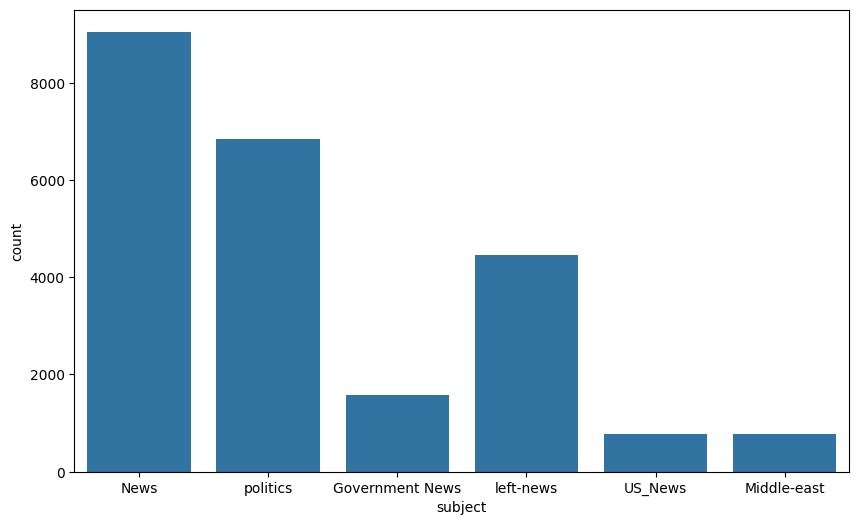

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'subject' , data=fake)

In [ ]:
text = ' '.join(fake['text'].tolist())

In [ ]:
' '.join(['this', 'is', 'my', 'work'])

'this is my work'

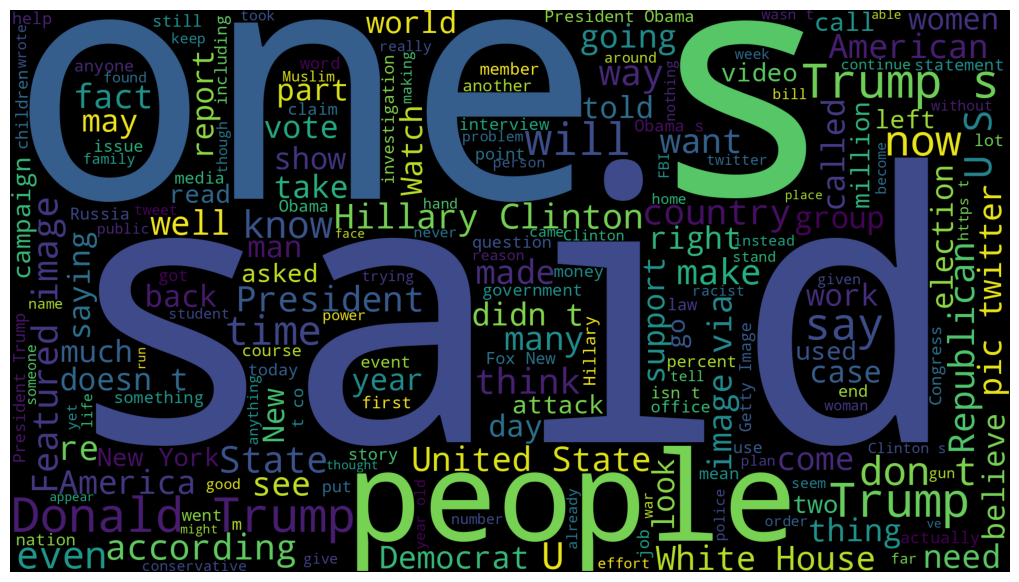

In [ ]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Exploring real news data


In [ ]:
real = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')

In [ ]:
text1 = ' '.join(real['text'].tolist())

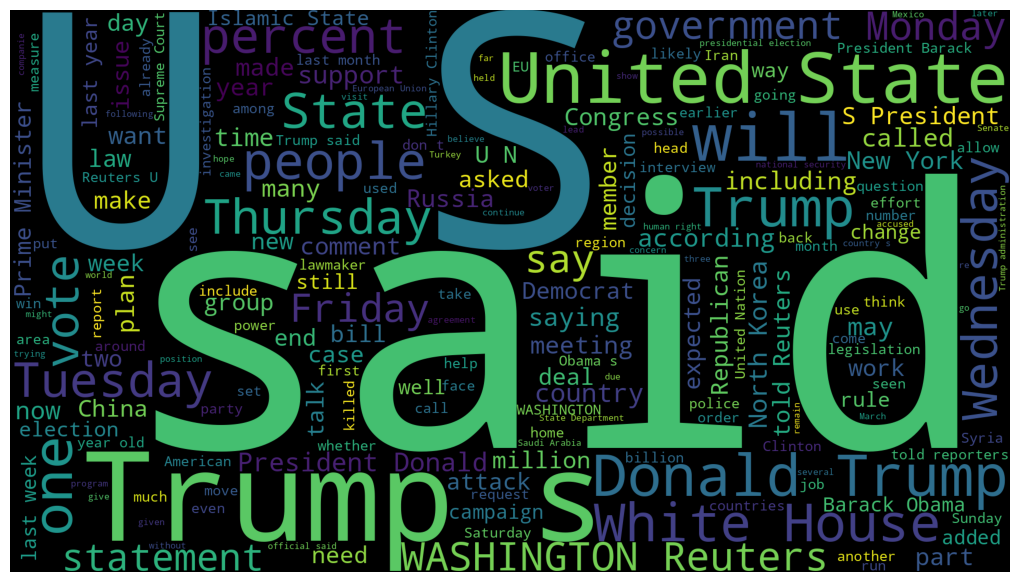

In [ ]:
wordcloud = WordCloud(width=1920, height=1080).generate(text1)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split(' - ', maxsplit=1)
    record[1]
    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [ ]:
print(unknown_publishers)

[7, 8, 12, 13, 14, 17, 27, 40, 67, 70, 97, 122, 140, 155, 156, 192, 222, 233, 252, 257, 284, 308, 321, 362, 384, 412, 453, 459, 495, 531, 838, 851, 1076, 1081, 1112, 1146, 1179, 1341, 1381, 1400, 1451, 1509, 1522, 1523, 1539, 1570, 1611, 1645, 1657, 1659, 1696, 1711, 1726, 1730, 1748, 1768, 1824, 1826, 1878, 1885, 1932, 1952, 1967, 2012, 2023, 2056, 2087, 2100, 2102, 2120, 2140, 2171, 2187, 2247, 2262, 2275, 2313, 2315, 2355, 2356, 2383, 2392, 2442, 2446, 2486, 2510, 2518, 2557, 2602, 2658, 2776, 2811, 2855, 2885, 2922, 3107, 3248, 3270, 3466, 3488, 3597, 3615, 3782, 3835, 3930, 3944, 3976, 4134, 4170, 4198, 4206, 4307, 4358, 4465, 4554, 4753, 5246, 5290, 5316, 5379, 5380, 5412, 5504, 5538, 5588, 5593, 5633, 5761, 5784, 5794, 5796, 5823, 5866, 5997, 6026, 6065, 6120, 6184, 6387, 6524, 6573, 6660, 6823, 7259, 7353, 7463, 7568, 7715, 7766, 7816, 7890, 7915, 7922, 8118, 8127, 8156, 8161, 8194, 8195, 8196, 8247, 8250, 8317, 8465, 8481, 8482, 8505, 8506, 8771, 8970, 9008, 9009, 9307, 9327, 

In [ ]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 229, dtype: object

In [ ]:
#drop 8970
real.drop(8970,axis=0)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [ ]:
publisher = []
tmp_text = []

for index , row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('unknown')

  else:
    record = row.split('-',maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())


In [ ]:
real['publisher'] = publisher
real['text'] = tmp_text

In [ ]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
real.isnull().sum()

title        0
text         0
subject      0
date         0
publisher    0
dtype: int64

In [ ]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
empty_fake_index = [index for index, text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [ ]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

In [ ]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

In [ ]:
real['class'] = 1
fake['class'] = 0

In [ ]:
real = real[['text', 'class']]
fake = fake[['text', 'class']]

In [ ]:
data = real.append(fake, ignore_index=True)

<ipython-input-28-45d5ced910ac>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = real.append(fake, ignore_index=True)


In [ ]:
data.tail()

,text,class
44893,mcpain: john mccain furious that iran treated ...,0
44894,justice? yahoo settles e-mail privacy class-ac...,0
44895,sunnistan: us and allied ‘safe zone’ plan to t...,0
44896,how to blow $700 million: al jazeera america f...,0
44897,10 u.s. navy sailors held by iranian military ...,0


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 79.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-k4ydx7_8
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-k4ydx7_8
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7602 sha256=b5d78a74802f0276b16d87e4cab5c5ea131538e26ed9b45933df17dfeb63aa39
  Stored in directory: /tmp/pip-ephem-wheel-cache-ikon0vwi/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps

In [ ]:
ps.remove_special_chars('this os 9 , sdj**djf@')

'this os 9 sdjdjf'

In [ ]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [ ]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


In [ ]:
!pip install gensim

In [ ]:
import gensim
from gensim.models import Word2Vec

In [ ]:
y = data['class'].values

In [ ]:
X = [d.split() for d in data['text'].tolist()]

In [ ]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [ ]:
DIM = 100
w2v_model = Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1)

In [ ]:
len(w2v_model.wv.key_to_index)

231910

In [ ]:
w2v_model.wv['shadow']

array([-1.3866953 ,  0.50131667, -0.71958673, -0.08180837, -0.28249326,
        1.250734  , -0.7199403 , -0.65098876, -0.9260664 ,  0.61445546,
        0.9969218 , -1.9009926 ,  0.27704424,  0.04040246,  0.48041025,
       -0.137612  ,  0.21478432,  0.23782511,  0.31841338, -1.2948334 ,
        0.6210828 , -0.9781858 , -0.8721522 , -0.12432567, -1.1027929 ,
        0.0971148 ,  0.6635319 , -0.44592312,  1.090909  ,  0.15994883,
       -0.26577723,  0.7945253 , -1.0379862 , -0.69324565,  1.4609303 ,
       -1.2147342 ,  0.1890572 ,  0.06370594,  0.02132966, -0.25871354,
       -0.06567791,  1.0190424 , -0.2679475 ,  1.0316327 ,  0.9347389 ,
       -0.30550268,  0.71034795, -0.5923229 ,  0.9203584 , -0.87576985,
        0.7334835 ,  0.01589456,  1.22562   , -0.71630216, -0.3570934 ,
       -0.20315436,  2.502687  , -0.77142316, -0.21419568, -0.30053842,
       -0.43830156,  0.00884867, -0.1804263 ,  0.05647245,  1.1409183 ,
        1.6363711 , -0.09480906,  0.76150036,  0.8539226 , -1.66

In [ ]:
w2v_model.wv.most_similar('india')

[('pakistan', 0.7198073267936707),
 ('malaysia', 0.6921395659446716),
 ('china', 0.6369703412055969),
 ('thailand', 0.6306893825531006),
 ('australia', 0.624086856842041),
 ('indias', 0.6233825087547302),
 ('indian', 0.6114678978919983),
 ('beijings', 0.6077651977539062),
 ('vietnama', 0.5976686477661133),
 ('asia', 0.597291886806488)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X = tokenizer.texts_to_sequences(X)

In [ ]:
tokenizer.word_index

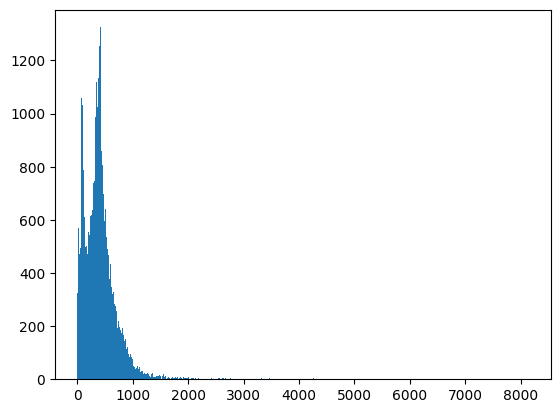

In [ ]:
plt.hist([len(x) for x in X], bins = 700)
plt.show()

In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos > 1000])

1584

In [ ]:
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_matrix  = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix


In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,output_dim=DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23191100  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23308477 (88.91 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 23191100 (88.47 MB)
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
model.fit(X_train,y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 32s 39ms/step - loss: 0.1687 - acc: 0.9359 - val_loss: 0.1067 - val_acc: 0.9670
Epoch 2/6
737/737 [==============================] - 27s 36ms/step - loss: 0.1043 - acc: 0.9651 - val_loss: 0.2564 - val_acc: 0.8998
Epoch 3/6
737/737 [==============================] - 27s 37ms/step - loss: 0.0752 - acc: 0.9748 - val_loss: 0.0482 - val_acc: 0.9862
Epoch 4/6
737/737 [==============================] - 28s 38ms/step - loss: 0.0363 - acc: 0.9888 - val_loss: 0.0288 - val_acc: 0.9906
Epoch 5/6
737/737 [==============================] - 28s 38ms/step - loss: 0.0236 - acc: 0.9930 - val_loss: 0.0236 - val_acc: 0.9923
Epoch 6/6
737/737 [==============================] - 27s 37ms/step - loss: 0.0139 - acc: 0.9961 - val_loss: 0.0199 - val_acc: 0.9938


In [ ]:
y_pred = (model.predict(X_test) >=0.5).astype(int)

351/351 [==============================] - 5s 13ms/step


In [ ]:
accuracy_score(y_test,y_pred)

0.9934966592427616

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5897
           1       0.99      0.99      0.99      5328

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
#now for daily news use tokenizer
#x = ['In a New Year’s Day tweet, Trump took aim at Pakistan arguing, “the United States has foolishly given Pakistan more than 33 billion dollars in aid over the last 15 years.” He vowed that would end. And, it did. In September, during the Labor Day holiday, military assistance to Pakistan ended. The $300m, according to a Pentagon spokesperson, would be “reprogrammed” for “other urgent priorities”. ']
#x = ['In 2018, fewer refugees made it into the US than any time during the previous 40 years. That’s because the Trump administration followed a campaign promise to cap the number of people coming to the United States.']
#x = ['The BJP consolidated its influence in the Northeast by winning the March polls in Tripura and joining the ruling coalition in Meghalaya and Nagaland. The Tripura elections also saw the emergence of tribal party Tipra Motha, led by former Congress leader and erstwhile royal Pradyot Bikram Manikya Debbarma.']
x = ['Finance Minister Nirmala Sitharaman will be presenting the interim Union Budget 2024 on February 1, Thursday. One of the most significant part of Parliament Budget session is the presentation of the Economic Survey on January 31.']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x,maxlen=maxlen)
model.predict(x)

1/1 [==============================] - 0s 54ms/step


array([[0.9845819]], dtype=float32)

In [ ]:
model.predict(x)

1/1 [==============================] - 0s 28ms/step


array([[0.9845819]], dtype=float32)

In [ ]:
if(model.predict(x) >=0.5).astype(int) == 0:
  print('Fake news')
else:
  print('Real news')

1/1 [==============================] - 0s 27ms/step
Real news


In [ ]:
#saving the model ----------------Pickle cant save neural network mmodels---------------------
import pickle

In [ ]:
from keras.models import save_model

In [ ]:
model.save('your_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
filename2 = 'tokenizer.sav'
pickle.dump(tokenizer, open(filename2, 'wb'))

In [ ]:
from keras.models import load_model

loaded_model = load_model('your_model.h5')
loaded_tokenizer = pickle.load(open('tokenizer.sav', 'rb'))

In [ ]:
#x = ['Finance Minister Nirmala Sitharaman will be presenting the interim Union Budget 2024 on February 1, Thursday. One of the most significant part of Parliament Budget session is the presentation of the Economic Survey on January 31.']
#x = ['In a New Year’s Day tweet, Trump took aim at Pakistan arguing, “the United States has foolishly given Pakistan more than 33 billion dollars in aid over the last 15 years.” He vowed that would end. And, it did. In September, during the Labor Day holiday, military assistance to Pakistan ended. The $300m, according to a Pentagon spokesperson, would be “reprogrammed” for “other urgent priorities”. ']
#x = ['Sweden has reportedly declared sex as a sport and the first-ever sex competition is scheduled to take place early next week. According to media reports the highly anticipated European Sex Championship, which will be happening under the guidance of the Swedish Sex Federation, will be held on June 8.']
x = ['I . I 7 A MAN MOVED THE HIGH COURT IN M.P. AFTER WIFE OBJECTED TO HIM DONATING PART OF HIS LIVER TO HIS BROTHER . ! \\ | _— e oL ‘ o i . Bl e § ﬂm,%i?_m;. b T \ Py . MW LRE i w i 1 HHt , 3 5 | i - THE COURT SAID THE DONOR BEING A MASTER OF HIS OWN CHOICE CANNOT BE PUT TO AN INTRUSIVE ACTION BY ANYONE THE COURT ALLOWED THE MAN TO GO AHEAD WITH THE TRANSPLANT =']
x = loaded_tokenizer.texts_to_sequences(x)
x = pad_sequences(x,maxlen=1000)

if(loaded_model.predict(x) >=0.5).astype(int) == 0:
  print('Fake news')
else:
  print('Real news')

1/1 [==============================] - 0s 334ms/step
Real news


**Installing THe Dependency**

In [ ]:
!pip install fastapi
!pip install uvicorn
!pip install pickles
!pip install pydantic
!pip install scikit-learn
!pip install requests
!pip install pypi-json
!pip install pyngrok
!pip install nest-asyncio
!pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 980.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.2/127.2 kB 11.6 MB/s eta 0:00:00


In [ ]:
!pip install fastapi[all]



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.9 MB/s eta 0:00:00


In [ ]:

!pip install -U typing-extensions==3.10.0.0



  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sqlalchemy 2.0.27 requires typing-extensions>=4.6.0, but you have typing-extensions 3.10.0.0 which is incompatible.
arviz 0.15.1 requires typing-extensions>=4.1.0, but you have typing-extensions 3.10.0.0 which is incompatible.
chex 0.1.85 requires typing-extensions>=4.2.0, but you have typing-extensions 3.10.0.0 which is incompatible.
cloudpathlib 0.16.0 requires typing_extensions>4; python_version < "3.11", but you have typing-extensions 3.10.0.0 which is incompatible.
fastapi 0.109.2 requires typing-extensions>=4.8.0, but you have typing-extensions 3.10.0.0 which is incompatible.
flax 0.8.1 requires typing-extensions>=4

In [ ]:
from fastapi import FastAPI
import numpy as np
import pickle
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

from pydantic import BaseModel
import json
import uvicorn
from pyngrok import ngrok
from fastapi.middleware.cors import CORSMiddleware
import nest_asyncio

In [ ]:
app = FastAPI()

In [ ]:
origins = ["*"]

app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

In [ ]:
class model_input(BaseModel):
    content: str


In [ ]:
#loading the model
loaded_model = load_model('your_model.h5')
loaded_tokenizer = pickle.load(open('tokenizer.sav', 'rb'))

In [ ]:
@app.post('/fake_news_prediction')
def news_pred(input_parameters : model_input):

    # Extracting text from input parameters
    text = [input_parameters.content]

    text = loaded_tokenizer.texts_to_sequences(text)
    text = pad_sequences(text,maxlen=1000)

    # Making predictions
    prediction = loaded_model.predict(text)

    if np.any(prediction >= 0.5):
        result = 'Real news'
    else:
        result = 'Fake news'

    return {'prediction': float(prediction[0, 0]), 'result': result}

In [ ]:
ngrok.set_auth_token("<Your Ngrok Token>")

ngrok_tunnel = ngrok.connect(8000)
print('Public URL', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

INFO:     Started server process [335]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


Public URL https://04ff-34-70-71-112.ngrok-free.app
